### Codio Activity 10.4: Hypothesis Testing for Stationarity


**Estimated Time: 45 Minutes**

**Total Points: 30**

This activity introduces an approach to run hypothesis tests on series to determine whether they are stationary or not.  The test is called the **Dicky Fuller Test**.  Similar to your earlier work with hypothesis tests, a null and alternative hypothesis are generated and a threshold determined.  Based on a $p$ value the hypothesis is either rejected or not rejected. 

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

### The Data

This example uses historical recruitment data from the year 1950 through 1987 and stock data from Google's Alphabet stock ticker.  For both series you will examine the results of the Dickey Fuller test for stationarity.  

In [32]:
recruitment = pd.read_csv('../data/recruitment.csv', index_col=0)

recruitment.index = pd.to_datetime(recruitment.index)
recruitment.head(2)

,value
1950-01-01,68.63
1950-02-01,68.63


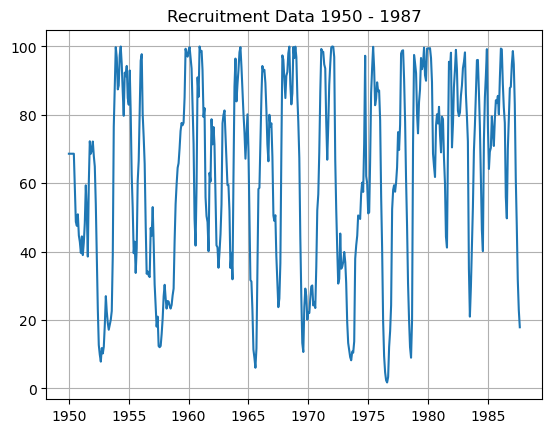

In [8]:
plt.plot(recruitment)
plt.title('Recruitment Data 1950 - 1987')
plt.grid();

[Back to top](#-Index)

### Problem 1

#### Using the `adfuller` object

**10 Points**

The `adfuller` object tests the null hypothesis on the series **is not** stationary.  The results contain information including the test statistic and $p$-value. You can compare the test statistic to the significance values for alphas .01, .05, and .1.  Remember that if your test statistic is outside these significance levels you would reject the null hypothesis.  

Use the `results` object and the help from the `adfuller` documentation below to determine if the recruitment series is stationary.  Assign your response as a string to `ans1` below -- 'yes' or 'no'. 

```
Returns
-------
adf : float
    The test statistic.
pvalue : float
    MacKinnon's approximate p-value based on MacKinnon (1994, 2010).
usedlag : int
    The number of lags used.
nobs : int
    The number of observations used for the ADF regression and calculation
    of the critical values.
critical values : dict
    Critical values for the test statistic at the 1 %, 5 %, and 10 %
    levels. Based on MacKinnon (2010).
icbest : float
    The maximized information criterion if autolag is not None.
resstore : ResultStore, optional
    A dummy class with results attached as attributes.
```

In [10]:
results = adfuller(recruitment)
results

(-6.239970407069513,
 4.723381272810701e-08,
 12,
 440,
 {'1%': -3.445299682487321,
  '5%': -2.8681312035123967,
  '10%': -2.570280872933884},
 3193.5098343134127)

In [12]:
### GRADED

# YOUR CODE HERE
ans1 = 'yes'

# Answer Check
print(ans1)# yes or no

yes


[Back to top](#-Index)

### Problem 2

#### Tesla and Stationarity

**5 Points**

Now, your goal is to examine the stationarity of Tesla's stock data.  Below, the data is loaded as `tsla` and you are to examine the `Adj Close` feature to determine whether or not the series is stationary.  Assign your results as a string to `ans2` below -- `yes` or `no`.  

In [14]:
tsla = pd.read_csv('../data/tsla.csv', index_col='Date')

In [16]:
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


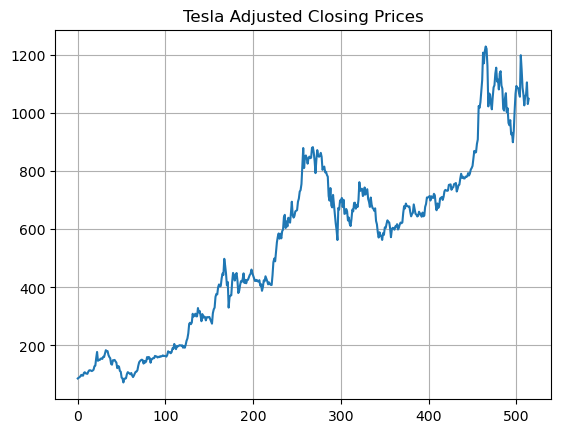

In [18]:
plt.plot(tsla['Adj Close'].values)
plt.title('Tesla Adjusted Closing Prices')
plt.grid();

In [24]:
results = adfuller(tsla['Adj Close'])
results

(-0.7759834584966364,
 0.8260751605853989,
 0,
 514,
 {'1%': -3.443136494643789,
  '5%': -2.8671794725841147,
  '10%': -2.5697736283668187},
 4580.514413326688)

In [20]:
### GRADED

# YOUR CODE HERE
ans2 = 'no'

# Answer Check
print(ans2)# yes or no

no


[Back to top](#-Index)

### Problem 3

#### Examining the differenced data

**5 Points**

When the original series may not be stationary, you may be interested instead in the differenced data.  

Below, create a series resulting from differencing the `Adj Close` feature using `diff()` and from dropping the missing values using `dropna()`. Assign this differenced series as `adj_diff`.

Then, use the `adfuller` results to determine if the series is stationary.  Assign your response as a string to `ans3` below. 

In [28]:
### GRADED
adj_diff = tsla['Adj Close'].diff().dropna()

# results = adfuller(adj_diff)
# results

ans3 = 'yes'

# # Answer Check
# plt.plot(adj_diff.values)
# plt.title('Difference Tesla Closing Data')
# plt.grid();
print(adj_diff.head())
print(ans3)# yes or no

Date
2020-01-03    2.549995
2020-01-06    1.706001
2020-01-07    3.503998
2020-01-08    4.616005
2020-01-09   -2.160004
Name: Adj Close, dtype: float64
yes


[Back to top](#-Index)

### Problem 4

#### Stationarity of residuals in a decomposition model

**10 Points**

Below, use the `recruitment` data to build a decomposition model using `STL` with all arguments default. Assign this resul to `stl`.

Use the `fit` function on `stl` to fit your results and assign the result to the variable `results`.

Pass these residuals to the `adfuller` object and decide whether or not the residuals are stationary at the 0.05 level.  Assign your answer as a string to `ans4` below.

In [42]:
### GRADED
stl = STL(recruitment['value'])
results = stl.fit()

# adfuller = adfuller(results.resid)
# adfuller

ans4 = 'yes'

# # Answer Check
ans4

'yes'

Using the **Dickey Fuller** test is important as some of our models will expect stationary data.  This test gives a basic tool for determining whether a series is stationary outside of the general eye test.  You should understand that an increasing or decreasing series is not going to be stationary.  